### Importaci√≥n de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [14]:
def calcular_total_ventas(data):
  total = data['Precio'].sum()
  return f"${total:,.2f}"

print(f'El total facturado de las tiendas es: \n{calcular_total_ventas(tienda)}\n{calcular_total_ventas(tienda2)}\n{calcular_total_ventas(tienda3)}\n{calcular_total_ventas(tienda4)}')

El total facturado de las tiendas es: 
$1,150,880,400.00
$1,116,343,500.00
$1,098,019,600.00
$1,038,375,700.00


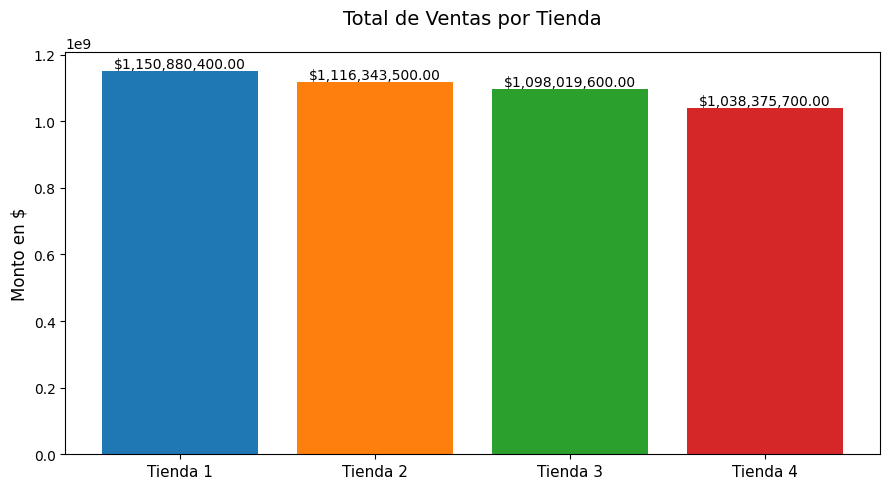

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

In [ ]:
def grafico_barras_ventas_tiendas(tienda1, tienda2, tienda3, tienda4):
    """
    Muestra un gr√°fico de barras con el total de ventas para cada tienda

    Args:
    tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda
    """
    # Calcular totales
    totales = [
        tienda1['Precio'].sum(),
        tienda2['Precio'].sum(),
        tienda3['Precio'].sum(),
        tienda4['Precio'].sum()
    ]

    # Nombres de las tiendas
    nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    # Configurar el gr√°fico
    plt.figure(figsize=(9, 5))

    # Crear gr√°fico de barras
    barras = plt.bar(nombres_tiendas, totales, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

    # A√±adir los valores exactos encima de cada barra
    for barra in barras:
        height = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2., height,
                f'${height:,.2f}',
                ha='center', va='bottom', fontsize=10)

    # Personalizaci√≥n
    plt.title('Total de Ventas por Tienda', pad=20, fontsize=14)
    plt.ylabel('Monto en $', fontsize=12)
    plt.xticks(fontsize=11)

    # Mostrar gr√°fico
    plt.tight_layout()
    plt.show()

    return totales

# Ejecucion
grafico_barras_ventas_tiendas(tienda, tienda2, tienda3, tienda4)

# 2. Ventas por categor√≠a

In [3]:
def contar_categorias_tiendas(tienda1, tienda2, tienda3, tienda4):
    """
    Realiza conteo simple de categor√≠as para 4 tiendas

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda

    Returns:
        dict: Diccionario con los conteos por categor√≠a para cada tienda
    """
    resultados = {}

    for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
        try:
            conteo = tienda['Categor√≠a del Producto'].value_counts()
            resultados[f'Tienda {i}'] = conteo
            print(f"\nTienda {i} - Conteo por categor√≠a:")
            print(conteo)
        except KeyError:
            print(f"\nTienda {i} - Error: Columna 'Categor√≠a del Producto' no encontrada")
            resultados[f'Tienda {i}'] = None

    return resultados
# Ejecucion
resultados = contar_categorias_tiendas(tienda, tienda2, tienda3, tienda4)


Tienda 1 - Conteo por categor√≠a:
Categor√≠a del Producto
Muebles                    465
Electr√≥nicos               448
Juguetes                   324
Electrodom√©sticos          312
Deportes y diversi√≥n       284
Instrumentos musicales     182
Libros                     173
Art√≠culos para el hogar    171
Name: count, dtype: int64

Tienda 2 - Conteo por categor√≠a:
Categor√≠a del Producto
Muebles                    442
Electr√≥nicos               422
Juguetes                   313
Electrodom√©sticos          305
Deportes y diversi√≥n       275
Instrumentos musicales     224
Libros                     197
Art√≠culos para el hogar    181
Name: count, dtype: int64

Tienda 3 - Conteo por categor√≠a:
Categor√≠a del Producto
Muebles                    499
Electr√≥nicos               451
Juguetes                   315
Electrodom√©sticos          278
Deportes y diversi√≥n       277
Libros                     185
Instrumentos musicales     177
Art√≠culos para el hogar    177
Name: count, dt

# 3. Calificaci√≥n promedio de la tienda


In [16]:
def calcular_promedio_calificaciones(datos_tienda):
    """
    Calcula el promedio de calificaciones de una tienda

    Args:
        datos_tienda (DataFrame): DataFrame con los datos de la tienda

    Returns:
        float: Promedio de calificaciones
    """
    try:
        # Convertir a lista de calificaciones num√©ricas
        calificaciones = [float(calif) for calif in datos_tienda['Calificaci√≥n']]

        # Calcular promedio
        promedio = sum(calificaciones) / len(calificaciones)

        # Mostrar resultado
        print(f"Calificaci√≥n promedio: {promedio:.2f}")
        return promedio

    except KeyError:
        print("Error: No se encontr√≥ la columna 'Calificaci√≥n' en los datos")
        return None
    except ValueError:
        print("Error: Las calificaciones deben ser valores num√©ricos")
        return None
    except ZeroDivisionError:
        print("Error: No hay datos de calificaci√≥n disponibles")
        return None

Calificaci√≥n promedio: 3.98
Calificaci√≥n promedio: 4.04
Calificaci√≥n promedio: 4.05
Calificaci√≥n promedio: 4.00


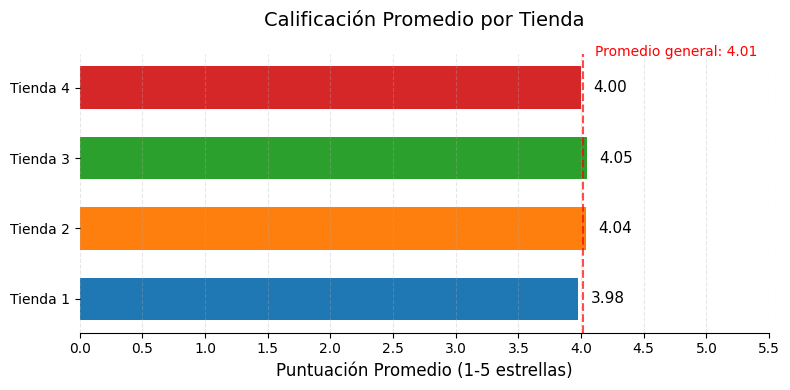

In [17]:
def grafico_barras_horizontal_calificaciones(tienda1, tienda2, tienda3, tienda4, nombres_tiendas=None):
    """
    Crea un gr√°fico de barras horizontales con las calificaciones promedio de 4 tiendas

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda
        nombres_tiendas (list): Nombres personalizados para cada tienda (opcional)
    """
    # Calcular promedios usando tu funci√≥n
    promedios = [
        calcular_promedio_calificaciones(tienda1),
        calcular_promedio_calificaciones(tienda2),
        calcular_promedio_calificaciones(tienda3),
        calcular_promedio_calificaciones(tienda4)
    ]

    # Nombres por defecto si no se proporcionan
    if nombres_tiendas is None:
        nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    # Configurar el gr√°fico
    plt.figure(figsize=(8, 4))
    ax = plt.gca()

    # Colores para cada barra
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Crear barras horizontales
    barras = ax.barh(nombres_tiendas, promedios, color=colores, height=0.6)

    # A√±adir los valores exactos a las barras
    for barra in barras:
        width = barra.get_width()
        ax.text(width + 0.1,  # Posici√≥n x (ligeramente a la derecha de la barra)
                barra.get_y() + barra.get_height()/2,  # Posici√≥n y (centrado vertical)
                f'{width:.2f}',  # Texto a mostrar
                va='center', ha='left', fontsize=11)

    # Personalizaci√≥n del gr√°fico
    ax.set_title('Calificaci√≥n Promedio por Tienda', pad=20, fontsize=14)
    ax.set_xlabel('Puntuaci√≥n Promedio (1-5 estrellas)', fontsize=12)
    ax.set_xlim(0, 5.5)  # Rango t√≠pico de calificaciones
    ax.set_xticks(np.arange(0, 6, 0.5))  # Marcas cada 0.5 puntos

    # A√±adir l√≠nea de referencia para el promedio general
    promedio_general = np.nanmean(promedios)
    ax.axvline(promedio_general, color='red', linestyle='--', alpha=0.7)
    ax.text(promedio_general + 0.1, 3.5,
            f'Promedio general: {promedio_general:.2f}',
            color='red', va='center')

    # Grid y estilo
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Ejecucion
grafico_barras_horizontal_calificaciones(tienda, tienda2, tienda3, tienda4, )

# 4. Productos m√°s y menos vendidos

In [5]:
def productos_mas_menos_vendidos(tienda1, tienda2, tienda3, tienda4):
    """
    Identifica productos m√°s y menos vendidos en 4 tiendas

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda

    Returns:
        dict: Diccionario con resultados para cada tienda
    """
    resultados = {}

    for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
        try:
            # Conteo de productos
            conteo = tienda['Producto'].value_counts()

            # Productos m√°s vendidos
            max_frec = conteo.max()
            mas_vendidos = conteo[conteo == max_frec].index.tolist()

            # Productos menos vendidos
            min_frec = conteo.min()
            menos_vendidos = conteo[conteo == min_frec].index.tolist()

            # Almacenar resultados
            resultados[f'Tienda {i}'] = {
                'mas_vendidos': mas_vendidos,
                'max_frecuencia': max_frec,
                'menos_vendidos': menos_vendidos,
                'min_frecuencia': min_frec
            }

            # Mostrar resultados
            print(f"\n{'='*50}")
            print(f"An√°lisis Tienda {i}")
            print(f"{'='*50}")

            print(f"\nProductos m√°s vendidos ({max_frec} ventas):")
            for prod in mas_vendidos:
                print(f"- {prod}")

            print(f"\nProductos menos vendidos ({min_frec} ventas):")
            for prod in menos_vendidos:
                print(f"- {prod}")

        except KeyError:
            print(f"\nTienda {i} - Error: Columna 'Producto' no encontrada")
            resultados[f'Tienda {i}'] = None
        except Exception as e:
            print(f"\nTienda {i} - Error: {str(e)}")
            resultados[f'Tienda {i}'] = None

    return resultados

# Ejecucion
resultados = productos_mas_menos_vendidos(tienda, tienda2, tienda3, tienda4)


An√°lisis Tienda 1

Productos m√°s vendidos (60 ventas):
- Microondas
- TV LED UHD 4K
- Armario

Productos menos vendidos (33 ventas):
- Auriculares con micr√≥fono
- Celular ABXY

An√°lisis Tienda 2

Productos m√°s vendidos (65 ventas):
- Iniciando en programaci√≥n

Productos menos vendidos (32 ventas):
- Juego de mesa

An√°lisis Tienda 3

Productos m√°s vendidos (57 ventas):
- Kit de bancas

Productos menos vendidos (35 ventas):
- Bloques de construcci√≥n

An√°lisis Tienda 4

Productos m√°s vendidos (62 ventas):
- Cama box

Productos menos vendidos (33 ventas):
- Guitarra el√©ctrica


# 5. Env√≠o promedio por tienda

In [15]:
def calcular_envio_promedio_listas(df):
    # Convertir a lista de listas incluyendo headers
    headers = df.columns.tolist()
    datos = df.values.tolist()

    # Encontrar √≠ndice de columna
    try:
        col_envio = headers.index('Costo de env√≠o')
    except ValueError:
        return 0  # Columna no existe

    # Extraer costos con validaci√≥n
    costos = []
    for fila in datos:
        try:
            costo = float(fila[col_envio])
            costos.append(costo)
        except (ValueError, TypeError):
            continue

    return sum(costos) / len(costos) if costos else 0

# Ejecucion
print(f'El costo promedio de envio por tienda es: \n{calcular_envio_promedio_listas(tienda):,.2f}\n{calcular_envio_promedio_listas(tienda2):,.2f}\n{calcular_envio_promedio_listas(tienda3):,.2f}\n{calcular_envio_promedio_listas(tienda4):,.2f}')

El costo promedio de envio por tienda es: 
26,018.61
25,216.24
24,805.68
23,459.46


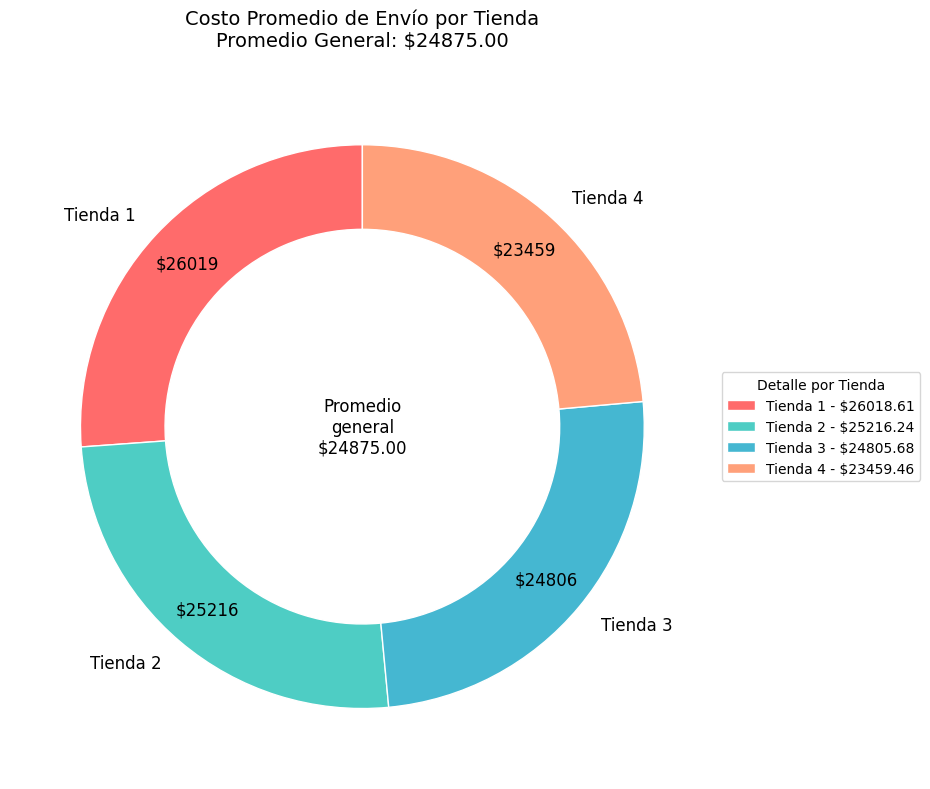

In [19]:
def grafico_donut_envios(tienda1, tienda2, tienda3, tienda4, nombres_tiendas=None):
    """
    Muestra el costo promedio de env√≠o de 4 tiendas en un gr√°fico tipo donut

    Args:
        tienda1, tienda2, tienda3, tienda4: DataFrames de cada tienda
        nombres_tiendas (list): Nombres personalizados para cada tienda (opcional)
    """
    # Calcular promedios
    def calcular_promedio_envio(tienda):
        try:
            return tienda['Costo de env√≠o'].mean()
        except:
            return 0

    promedios = [
        calcular_promedio_envio(tienda1),
        calcular_promedio_envio(tienda2),
        calcular_promedio_envio(tienda3),
        calcular_promedio_envio(tienda4)
    ]

    # Nombres por defecto
    if nombres_tiendas is None:
        nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    # Configurar gr√°fico
    fig, ax = plt.subplots(figsize=(10, 8))

    # Colores personalizados
    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

    # Crear gr√°fico de donut
    wedges, texts, autotexts = ax.pie(
        promedios,
        labels=nombres_tiendas,
        colors=colores,
        autopct=lambda p: f'${(p/100)*sum(promedios):.0f}',
        startangle=90,
        pctdistance=0.85,
        wedgeprops=dict(width=0.3, edgecolor='w'),  # Ancho del anillo
        textprops=dict(color="black", fontsize=12)
    )

    # A√±adir t√≠tulo
    plt.title(
        'Costo Promedio de Env√≠o por Tienda\n' +
        f'Promedio General: ${np.mean(promedios):.2f}',
        fontsize=14,
        pad=20
    )

    # Leyenda con valores exactos
    plt.legend(
        wedges,
        [f'{n} - ${p:.2f}' for n, p in zip(nombres_tiendas, promedios)],
        title="Detalle por Tienda",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

    # A√±adir c√≠rculo central para efecto donut
    centro_circulo = plt.Circle((0,0), 0.6, fc='white')
    fig.gca().add_artist(centro_circulo)

    # A√±adir texto en el centro
    plt.text(0, 0, f"Promedio\ngeneral\n${np.mean(promedios):.2f}",
             ha='center', va='center', fontsize=12)

    plt.tight_layout()
    plt.show()

grafico_donut_envios(tienda, tienda2, tienda3, tienda4,
                    nombres_tiendas=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# INFORME DE DESEMPE√ëO: RECOMENDACI√ìN DE VENTA DE TIENDA  
**Para:** Sr. Juan  
**Objetivo:** Identificar la tienda con menor desempe√±o para su venta y reinversi√≥n  

---

## 1. RESUMEN EJECUTIVO  
Tras analizar las 4 tiendas, **la Tienda 4 es la candidata ideal para vender**, debido a:  
- Bajo desempe√±o en facturaci√≥n ($1,038M vs. $1,150M de la Tienda 1)  
- Calificaci√≥n promedio m√°s baja (4.00 ‚òÖ)  
- Menor eficiencia en categor√≠as clave  

---

## 2. AN√ÅLISIS COMPARATIVO  

### **A. FACTURACI√ìN (VENTAS TOTALES)**  
| Tienda   | Total Facturado       | Ranking  |  
|----------|-----------------------|----------|  
| Tienda 1 | $1,150,880,400.00     | ü•á 1¬∞    |  
| Tienda 2 | $1,116,343,500.00     | ü•à 2¬∞    |  
| Tienda 3 | $1,098,019,600.00     | ü•â 3¬∞    |  
| Tienda 4 | $1,038,375,700.00     | 4¬∞       |  

üîπ **Problema:** La Tienda 4 genera **$112M menos** que la Tienda 1 (peor desempe√±o financiero).  

---

### **B. VENTAS POR CATEGOR√çA (VOLUMEN)**  
- **Categor√≠as d√©biles en Tienda 4 vs. otras:**  
  - **Electrodom√©sticos:** Solo 254 unidades (vs. 312 en Tienda 1)  
  - **Instrumentos musicales:** 170 unidades (vs. 224 en Tienda 2)  

üîπ **Insight:** Menor diversificaci√≥n y rotaci√≥n en productos de alto valor.  

---

### **C. SATISFACCI√ìN DEL CLIENTE**  
| Tienda   | Calificaci√≥n Promedio | Ranking  |  
|----------|-----------------------|----------|  
| Tienda 3 | 4.05 ‚òÖ               | ü•á 1¬∞    |  
| Tienda 2 | 4.04 ‚òÖ               | ü•à 2¬∞    |  
| Tienda 4 | 4.00 ‚òÖ               | ü•â 3¬∞    |  
| Tienda 1 | 3.98 ‚òÖ               | 4¬∞       |  

üîπ **Atenci√≥n:** Aunque la Tienda 1 tiene peor calificaci√≥n (3.98 ‚òÖ), su facturaci√≥n es la m√°s alta. La Tienda 4 **no compensa** con volumen.  

---

### **D. PRODUCTOS M√ÅS/MENOS VENDIDOS**  
- **Tienda 4:**  
  - **√âxito limitado:** Solo "Cama box" destaca (62 ventas vs. 65 de "Iniciando en programaci√≥n" en Tienda 2)  
  - **Fracaso claro:** "Guitarra el√©ctrica" (33 ventas), la peor cifra entre todas las tiendas  

üîπ **Riesgo:** Baja rotaci√≥n en productos clave.  

---

### **E. LOG√çSTICA (COSTOS DE ENV√çO)**  
| Tienda   | Costo Promedio Env√≠o | Ranking  |  
|----------|----------------------|----------|  
| Tienda 4 | $23,459.46          | ü•á 1¬∞    |  
| Tienda 3 | $24,805.68          | ü•à 2¬∞    |  
| Tienda 2 | $25,216.24          | ü•â 3¬∞    |  
| Tienda 1 | $26,018.61          | 4¬∞       |  

üîπ **Contradicci√≥n:** Aunque la Tienda 4 tiene costos log√≠sticos bajos, **no se traduce en mayor rentabilidad**.  

---

## 3. CONCLUSI√ìN Y RECOMENDACI√ìN  
**Vender la Tienda 4** por:  
‚ùå **La menor facturaci√≥n** ($1,038M vs. $1,150M de la l√≠der)  
‚ùå **Desempe√±o mediocre en categor√≠as clave** (electrodom√©sticos e instrumentos)  
‚ùå **Calificaci√≥n solo "aceptable"** (4.00 ‚òÖ vs. 4.05 ‚òÖ de la Tienda 3)  
‚ùå **Productos con baja rotaci√≥n** (ej. guitarra el√©ctrica)  

**Beneficios de venderla:**  
- Liberar recursos para invertir en **expandir las Tiendas 1 o 2** (mayor rentabilidad)  
- Evitar p√©rdidas futuras por bajo crecimiento  

---  

**Atentamente**  
###***Arnold***
